# What has Changed:
1. When calling the model we should pass the full size of the image, so that the bias is initialized to that size. When we want to use different size images we just pass the resized image through the model and everything should be done in the model. 
2. The resize functions are now working. Note: Not all images are the same size so in every epoch we have to resize all the images to the correct size, and when resizing remember sizes must be divisible by 32 to avoid rounding which causes a tensor mismatch when concatinating
TODO: the model is still not working for the detection task, I just tested on the segmentation dataset
3. For the detection task I think we misunderstood the paper, the papers mentions that they use a similair approach to sweatyNet so from what I understood is that the labels and outputs are not bounding boxes, but they are gaussian blurs, so for the training data we convert the center of the bounding box of the ball to a gaussian blob, and then the result of the model is a heatmap, and then they used some algorthim to detect the peaks in the heatmap, and these peaks are the models detection. (As far as I understood, but I will double check with hafez) 
4. 

# Imports

In [1]:
# Add module files on path
import sys
sys.path.append('./modules')

# Importing
import torch
import numpy as np
from model import Model
from utils import xml_to_csv,resize_seg,resize_det
from torch.utils.data import DataLoader, random_split
from dataset import MyDecDataset, MySegDataset, MyDataLoader
from visualize import show_labeled_image, show_image_and_seg, show_tensor

torch.manual_seed(24)

# Datasets

## Detection Dataset

### TODOS:

- Transformations applied to train, val, and test.... Maybe we need to find a better way

In [2]:
# Convert XML files to CSV to create dataset
xml_to_csv('./Dataset/blob/**/*.xml', 'labels.csv')

Processed 8876 images


In [3]:
# Create custom dataset class
dataset_dt = MyDecDataset('labels.csv')

In [4]:
# Split dataset
train_size = int(0.7 * len(dataset_dt))
test_size = int(0.15 * len(dataset_dt))
validation_size = len(dataset_dt) - (train_size + test_size)

train_dt, validation_dt, test_dt = random_split(dataset_dt, [train_size, validation_size, test_size])

In [5]:
print("Size of detection test set", len(train_dt))
print("Size of detection training set:", len(test_dt))
print("Size of detection validation set:", len(validation_dt))

Size of detection test set 6209
Size of detection training set: 1330
Size of detection validation set: 1332


Shape:  torch.Size([3, 360, 540])


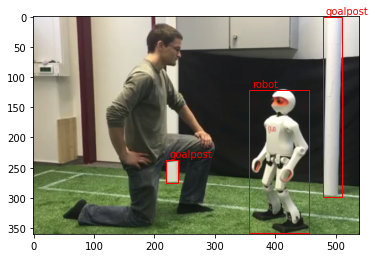

In [6]:
test_loader_dt = MyDataLoader(test_dt, batch_size=1, shuffle=True)
train_loader_dt = MyDataLoader(train_dt, batch_size=1, shuffle=True)
validation_loader_dt = MyDataLoader(validation_dt, batch_size=1, shuffle=True)

# Display first training image
for image, target in train_loader_dt:
    print("Shape: ", image[0].shape)
    show_labeled_image(image[0], target[0]["boxes"], target[0]["labels"])
    break

## Segmentation Dataset

In [7]:
# Create custom dataset
dataset_seg = MySegDataset('./Dataset/segmentation')

In [8]:
print("Size of segmentation dataset ", len(dataset_seg))

Size of segmentation dataset  1192


In [9]:
# Split dataset
train_size = int(0.7 * len(dataset_seg))
test_size = int(0.15 * len(dataset_seg))
validation_size = len(dataset_seg) - (train_size + test_size)

train_seg, validation_seg, test_seg = random_split(dataset_seg, [train_size, validation_size, test_size])

In [10]:
print("Size of segmentation test set", len(test_seg))
print("Size of detection training set:", len(train_seg))
print("Size of detection validation set:", len(validation_seg))

Size of segmentation test set 178
Size of detection training set: 834
Size of detection validation set: 180


Image path:  ./Dataset/segmentation/dataset/image/opx_frame002265.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002265.png
Shape:  (480, 640, 3)


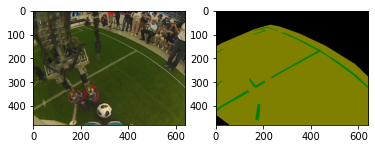

In [11]:
# Create dataloader for segmentation data
test_loader_seg = MyDataLoader(test_seg, batch_size=1, shuffle=True)
train_loader_seg = MyDataLoader(train_seg, batch_size=1, shuffle=True)
validation_loader_seg = MyDataLoader(validation_seg, batch_size=1, shuffle=True)

# Just as a sanity check display the test set
for image, target in train_loader_seg:
    print("Shape: ", target[0].shape)
    show_image_and_seg(image[0], target[0])
    break

### Model

Image path:  ./Dataset/segmentation/dataset/image/opx_frame003945.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003945.png
before torch.Size([1, 3, 480, 640])


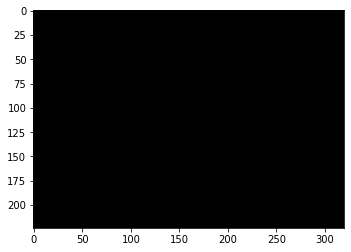

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/2019-06-19-10-58-10.jpg
Label:  ./Dataset/segmentation/dataset/target/2019-06-19-10-58-10.png
before torch.Size([1, 3, 480, 640])


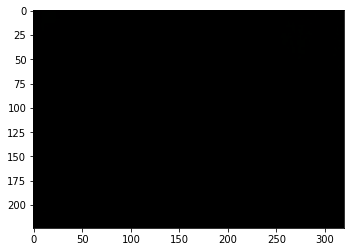

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001240.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001240.png
before torch.Size([1, 3, 480, 640])


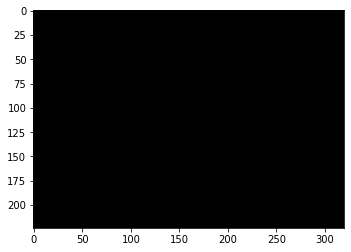

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame000095.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame000095.png
before torch.Size([1, 3, 480, 640])


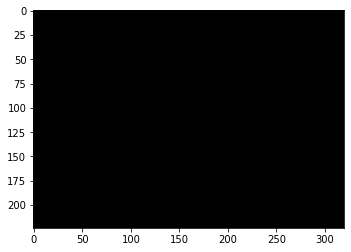

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001630.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001630.png
before torch.Size([1, 3, 480, 640])


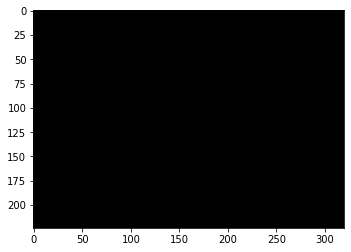

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001580.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001580.png
before torch.Size([1, 3, 480, 640])


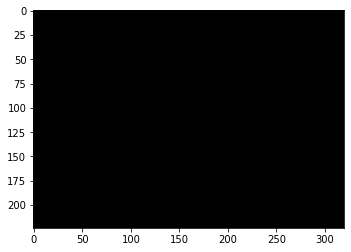

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001260.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001260.png
before torch.Size([1, 3, 480, 640])


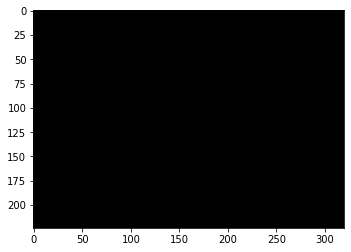

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004105.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004105.png
before torch.Size([1, 3, 480, 640])


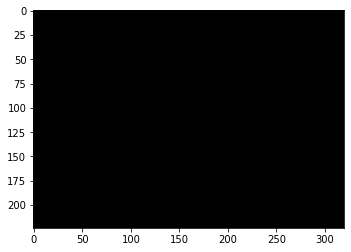

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/forceTrain/image/2019-07-02-05-53-28.jpg
Label:  ./Dataset/segmentation/forceTrain/target/2019-07-02-05-53-28.png
before torch.Size([1, 3, 480, 640])


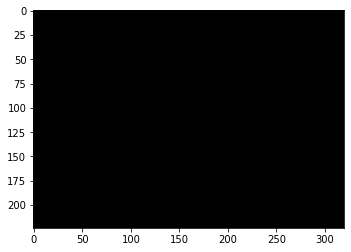

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame000880.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame000880.png
before torch.Size([1, 3, 480, 640])


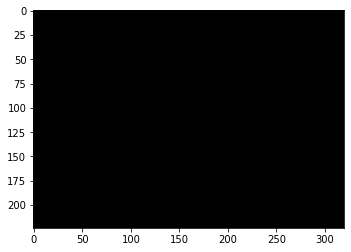

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002840.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002840.png
before torch.Size([1, 3, 480, 640])


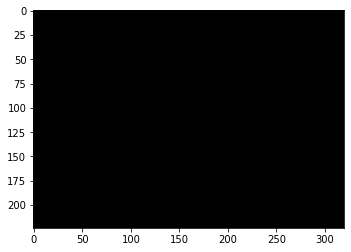

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004135.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004135.png
before torch.Size([1, 3, 480, 640])


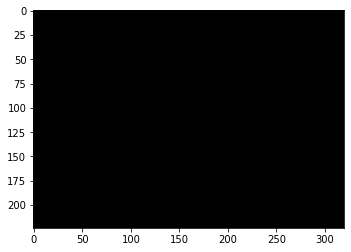

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004720.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004720.png
before torch.Size([1, 3, 480, 640])


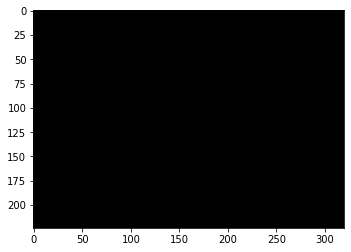

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame005540.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame005540.png
before torch.Size([1, 3, 480, 640])


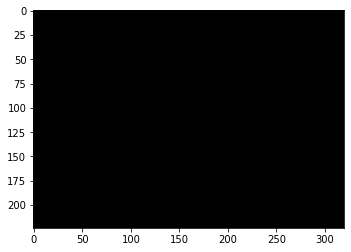

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame005220.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame005220.png
before torch.Size([1, 3, 480, 640])


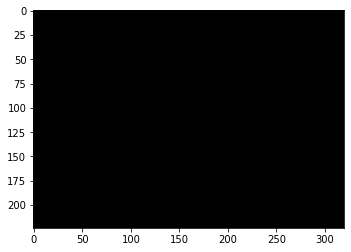

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001205.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001205.png
before torch.Size([1, 3, 480, 640])


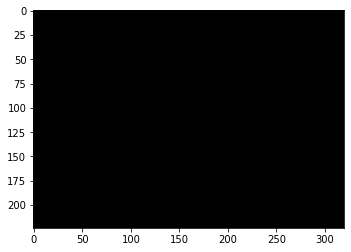

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003895.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003895.png
before torch.Size([1, 3, 480, 640])


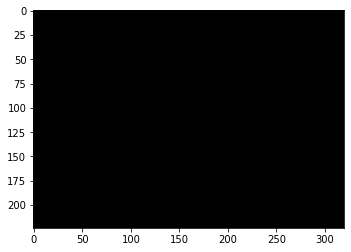

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004455.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004455.png
before torch.Size([1, 3, 480, 640])


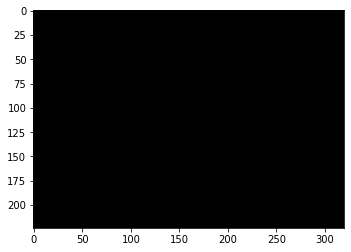

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/2019-06-19-10-57-12.jpg
Label:  ./Dataset/segmentation/dataset/target/2019-06-19-10-57-12.png
before torch.Size([1, 3, 480, 640])


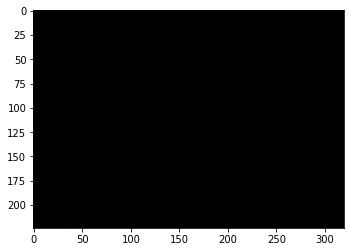

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004645.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004645.png
before torch.Size([1, 3, 480, 640])


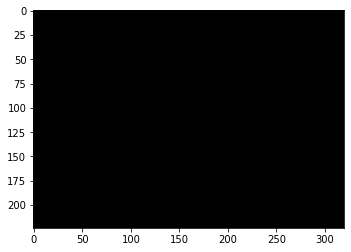

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004575.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004575.png
before torch.Size([1, 3, 480, 640])


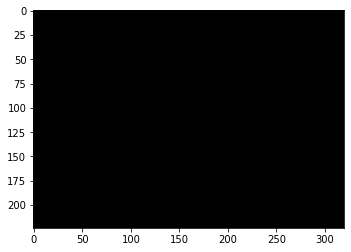

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004205.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004205.png
before torch.Size([1, 3, 480, 640])


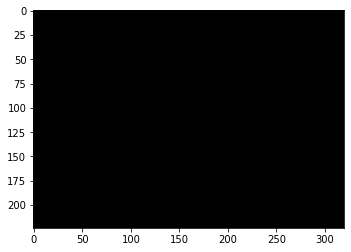

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002625.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002625.png
before torch.Size([1, 3, 480, 640])


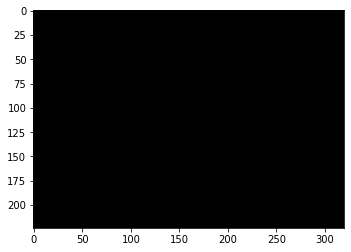

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame005270.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame005270.png
before torch.Size([1, 3, 480, 640])


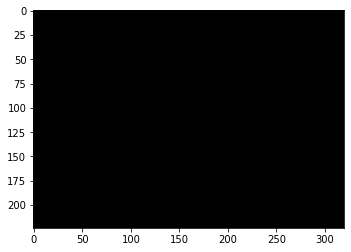

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003785.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003785.png
before torch.Size([1, 3, 480, 640])


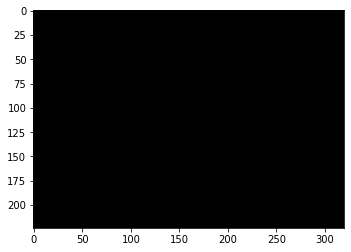

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003670.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003670.png
before torch.Size([1, 3, 480, 640])


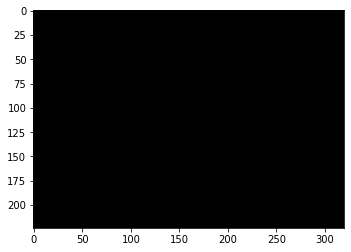

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002465.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002465.png
before torch.Size([1, 3, 480, 640])


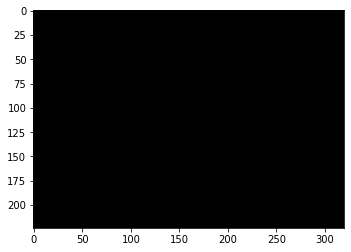

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002360.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002360.png
before torch.Size([1, 3, 480, 640])


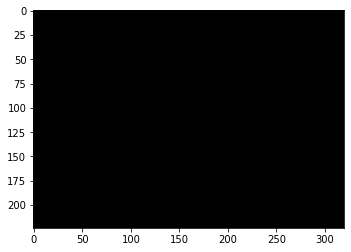

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001110.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001110.png
before torch.Size([1, 3, 480, 640])


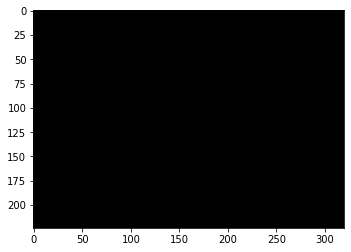

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002680.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002680.png
before torch.Size([1, 3, 480, 640])


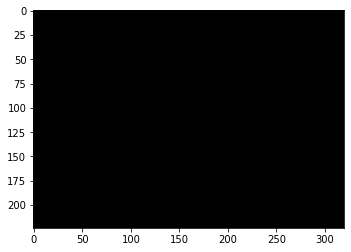

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002335.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002335.png
before torch.Size([1, 3, 480, 640])


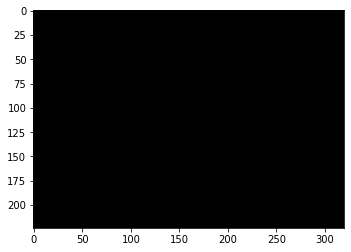

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002495.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002495.png
before torch.Size([1, 3, 480, 640])


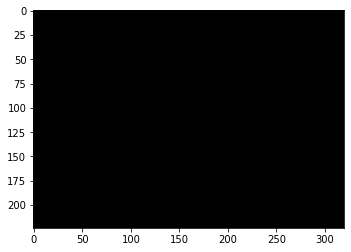

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004680.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004680.png
before torch.Size([1, 3, 480, 640])


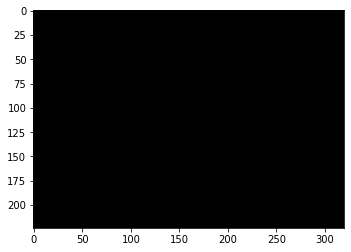

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004610.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004610.png
before torch.Size([1, 3, 480, 640])


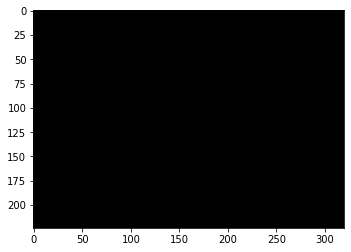

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004950.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004950.png
before torch.Size([1, 3, 480, 640])


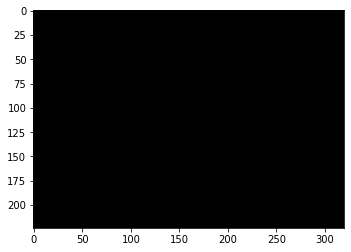

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004255.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004255.png
before torch.Size([1, 3, 480, 640])


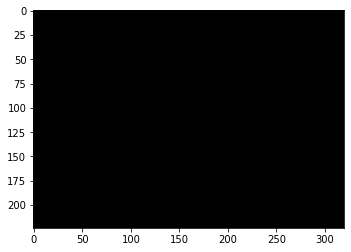

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003270.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003270.png
before torch.Size([1, 3, 480, 640])


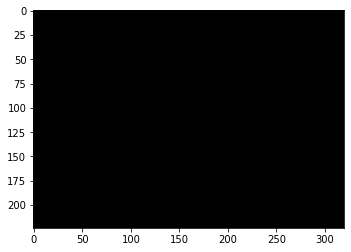

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001985.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001985.png
before torch.Size([1, 3, 480, 640])


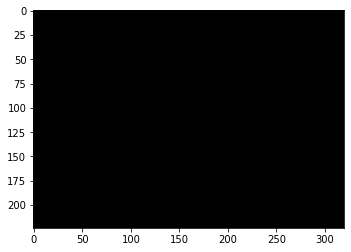

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003710.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003710.png
before torch.Size([1, 3, 480, 640])


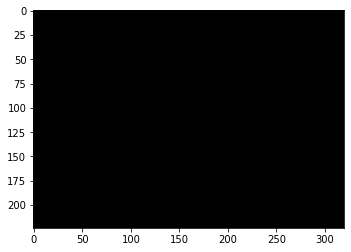

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame005625.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame005625.png
before torch.Size([1, 3, 480, 640])


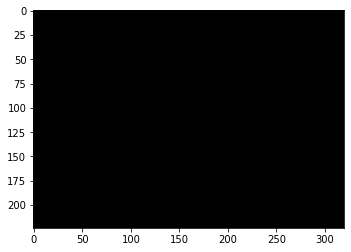

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame005520.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame005520.png
before torch.Size([1, 3, 480, 640])


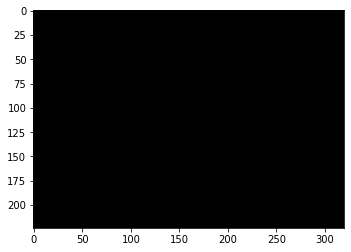

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002990.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002990.png
before torch.Size([1, 3, 480, 640])


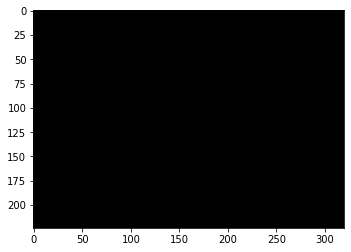

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame005090.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame005090.png
before torch.Size([1, 3, 480, 640])


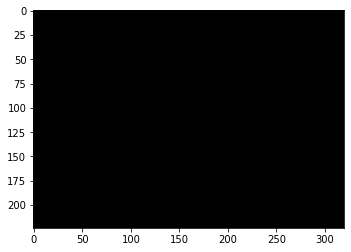

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002900.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002900.png
before torch.Size([1, 3, 480, 640])


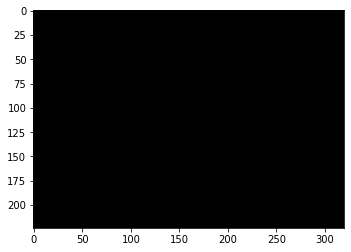

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001875.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001875.png
before torch.Size([1, 3, 480, 640])


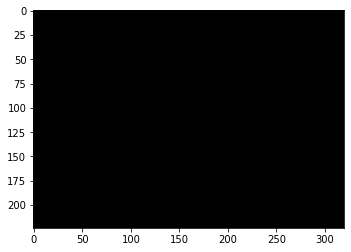

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002175.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002175.png
before torch.Size([1, 3, 480, 640])


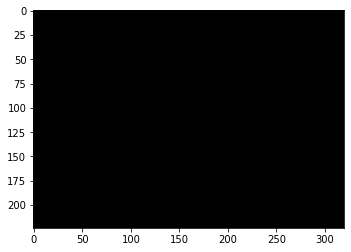

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/bs13_leipzig_robocup16_009.310.jpg
Label:  ./Dataset/segmentation/dataset/target/bs13_leipzig_robocup16_009.310.png
before torch.Size([1, 3, 600, 800])


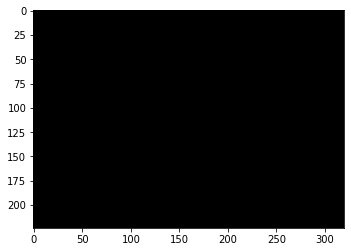

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002080.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002080.png
before torch.Size([1, 3, 480, 640])


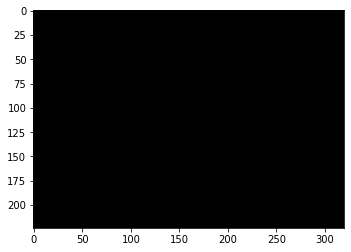

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001350.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001350.png
before torch.Size([1, 3, 480, 640])


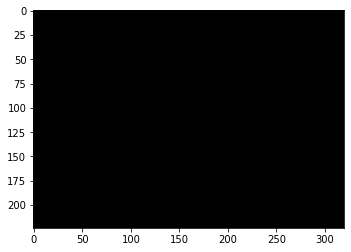

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/2019-06-18-19-49-53.jpg
Label:  ./Dataset/segmentation/dataset/target/2019-06-18-19-49-53.png
before torch.Size([1, 3, 480, 640])


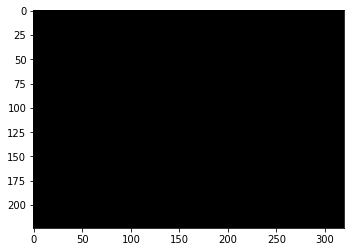

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/forceTrain/image/2019-07-02-05-53-52.jpg
Label:  ./Dataset/segmentation/forceTrain/target/2019-07-02-05-53-52.png
before torch.Size([1, 3, 480, 640])


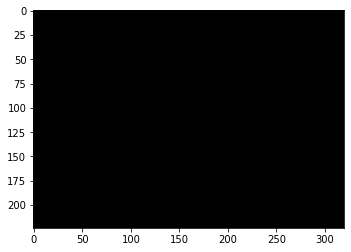

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001505.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001505.png
before torch.Size([1, 3, 480, 640])


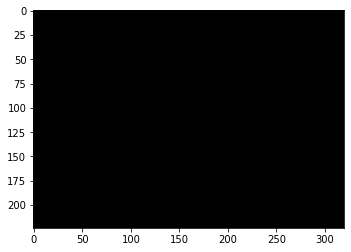

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/2019-06-18-19-50-27.jpg
Label:  ./Dataset/segmentation/dataset/target/2019-06-18-19-50-27.png
before torch.Size([1, 3, 480, 640])


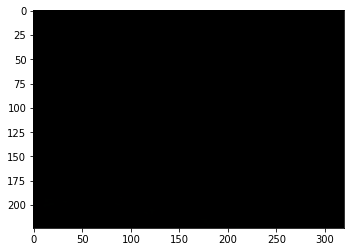

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/forceTrain/image/2019-07-02-06-58-47.jpg
Label:  ./Dataset/segmentation/forceTrain/target/2019-07-02-06-58-47.png
before torch.Size([1, 3, 480, 640])


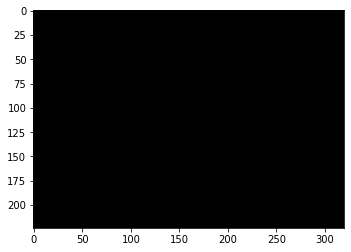

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002725.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002725.png
before torch.Size([1, 3, 480, 640])


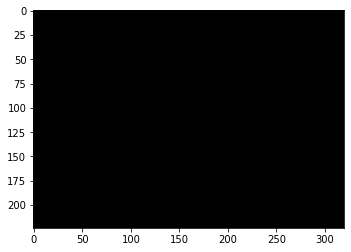

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001720.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001720.png
before torch.Size([1, 3, 480, 640])


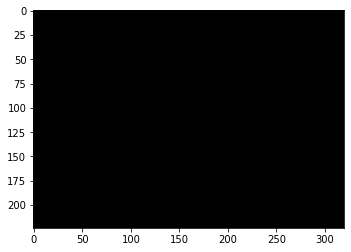

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001515.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001515.png
before torch.Size([1, 3, 480, 640])


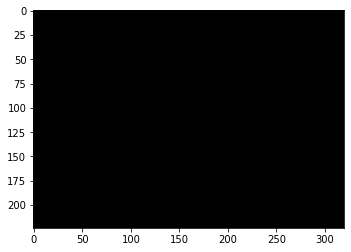

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004965.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004965.png
before torch.Size([1, 3, 480, 640])


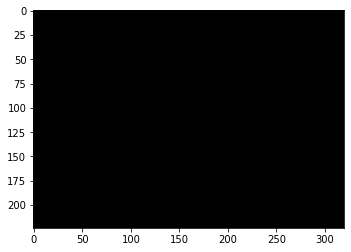

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame005115.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame005115.png
before torch.Size([1, 3, 480, 640])


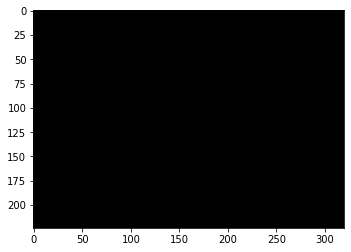

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003395.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003395.png
before torch.Size([1, 3, 480, 640])


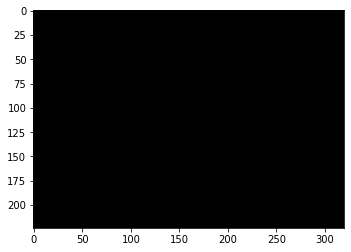

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004380.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004380.png
before torch.Size([1, 3, 480, 640])


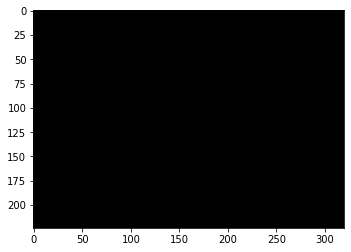

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002795.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002795.png
before torch.Size([1, 3, 480, 640])


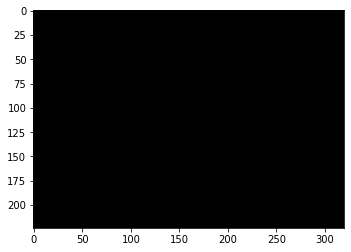

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004400.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004400.png
before torch.Size([1, 3, 480, 640])


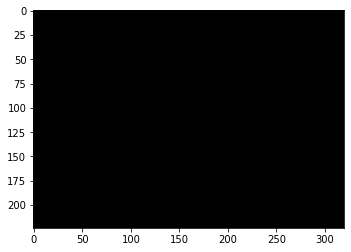

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002140.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002140.png
before torch.Size([1, 3, 480, 640])


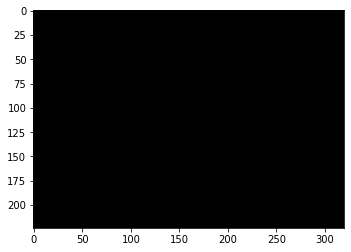

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001370.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001370.png
before torch.Size([1, 3, 480, 640])


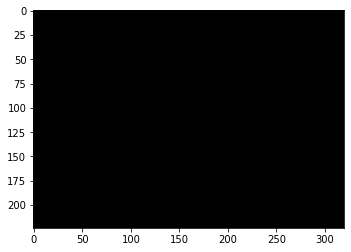

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/2019-06-19-10-55-51.jpg
Label:  ./Dataset/segmentation/dataset/target/2019-06-19-10-55-51.png
before torch.Size([1, 3, 480, 640])


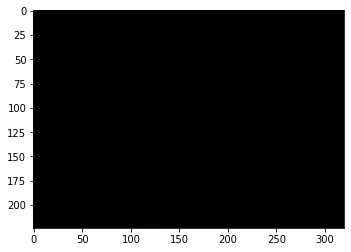

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003645.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003645.png
before torch.Size([1, 3, 480, 640])


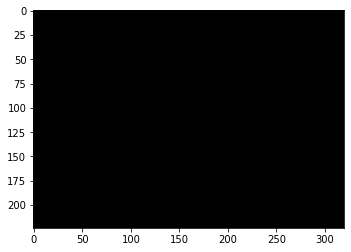

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003280.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003280.png
before torch.Size([1, 3, 480, 640])


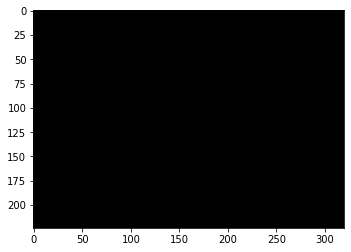

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002240.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002240.png
before torch.Size([1, 3, 480, 640])


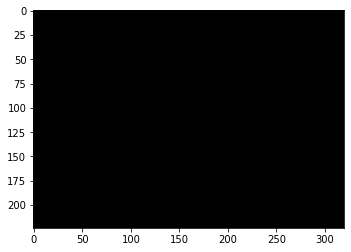

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002975.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002975.png
before torch.Size([1, 3, 480, 640])


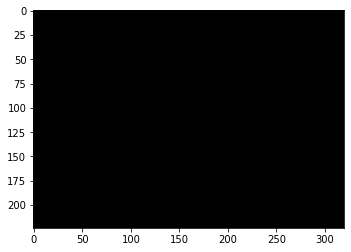

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame005595.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame005595.png
before torch.Size([1, 3, 480, 640])


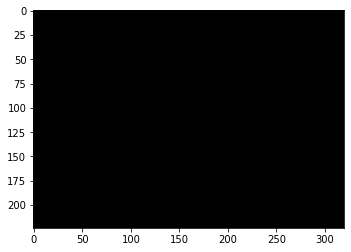

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/bs09_leipzig_robocup16_005.490.jpg
Label:  ./Dataset/segmentation/dataset/target/bs09_leipzig_robocup16_005.490.png
before torch.Size([1, 3, 600, 800])


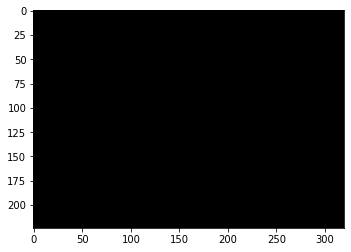

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002320.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002320.png
before torch.Size([1, 3, 480, 640])


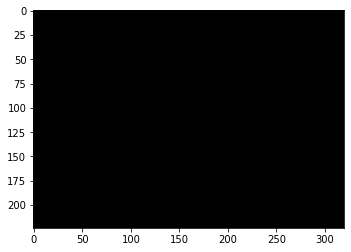

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002730.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002730.png
before torch.Size([1, 3, 480, 640])


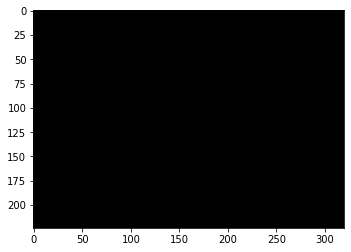

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001485.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001485.png
before torch.Size([1, 3, 480, 640])


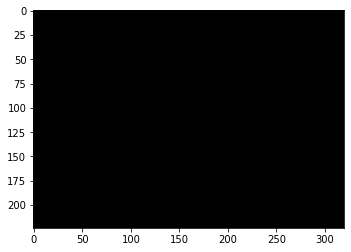

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/forceTrain/image/2019-07-05-01-01-42-785.jpg
Label:  ./Dataset/segmentation/forceTrain/target/2019-07-05-01-01-42-785.png
before torch.Size([1, 3, 480, 640])


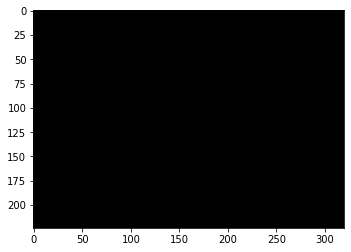

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/bs11_leipzig_robocup16_007.620.jpg
Label:  ./Dataset/segmentation/dataset/target/bs11_leipzig_robocup16_007.620.png
before torch.Size([1, 3, 600, 800])


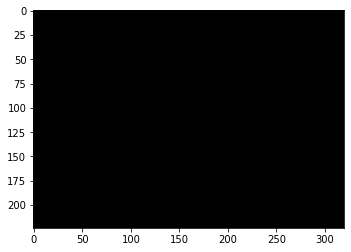

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003705.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003705.png
before torch.Size([1, 3, 480, 640])


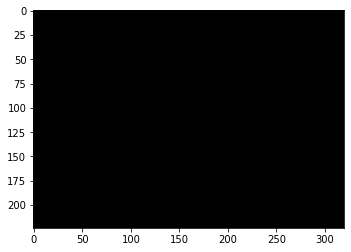

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001860.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001860.png
before torch.Size([1, 3, 480, 640])


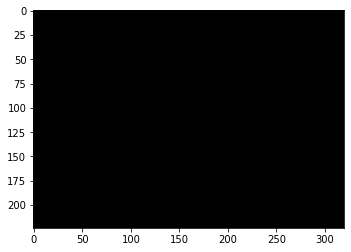

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003390.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003390.png
before torch.Size([1, 3, 480, 640])


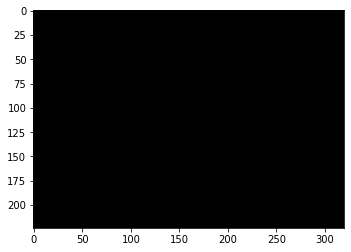

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001305.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001305.png
before torch.Size([1, 3, 480, 640])


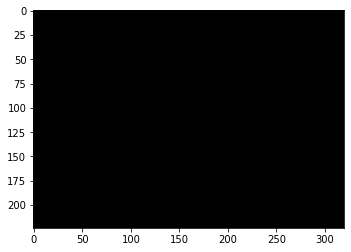

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame004115.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame004115.png
before torch.Size([1, 3, 480, 640])


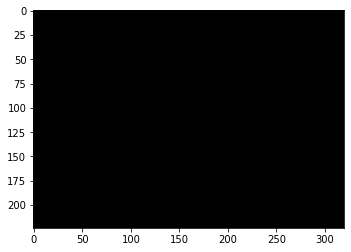

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame002295.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame002295.png
before torch.Size([1, 3, 480, 640])


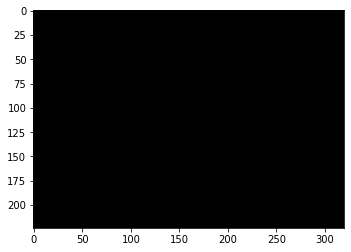

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame003125.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame003125.png
before torch.Size([1, 3, 480, 640])


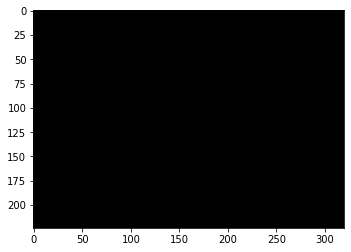

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame000895.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame000895.png
before torch.Size([1, 3, 480, 640])


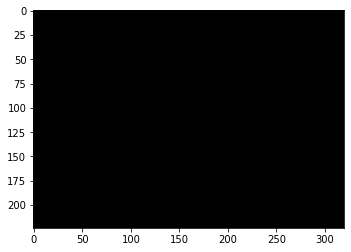

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/bs03_leipzig_robocup16_000.381.jpg
Label:  ./Dataset/segmentation/dataset/target/bs03_leipzig_robocup16_000.381.png
before torch.Size([1, 3, 600, 800])


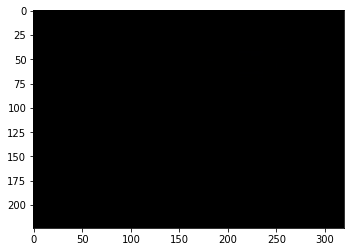

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame005010.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame005010.png
before torch.Size([1, 3, 480, 640])


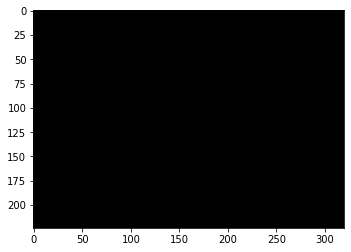

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame001880.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame001880.png
before torch.Size([1, 3, 480, 640])


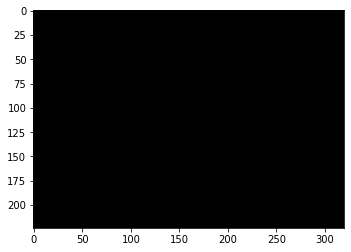

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/bn_ball_move_1_00991.jpg
Label:  ./Dataset/segmentation/dataset/target/bn_ball_move_1_00991.png
before torch.Size([1, 3, 600, 800])


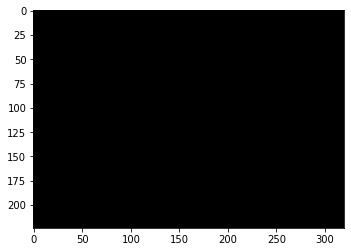

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/forceTrain/image/2019-07-02-05-53-30.jpg
Label:  ./Dataset/segmentation/forceTrain/target/2019-07-02-05-53-30.png
before torch.Size([1, 3, 480, 640])


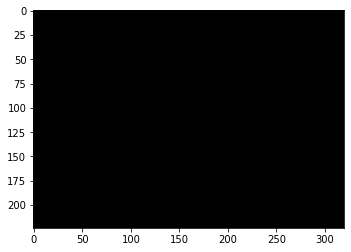

after torch.Size([1, 3, 224, 320])
torch.Size([1, 3, 56, 80])
Image path:  ./Dataset/segmentation/dataset/image/opx_frame005290.jpg
Label:  ./Dataset/segmentation/dataset/target/opx_frame005290.png
before torch.Size([1, 3, 480, 640])


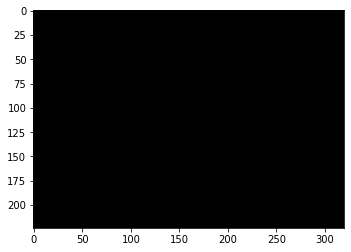

In [ ]:
model = Model(640,480)
test_seg_data_loader = DataLoader(test_seg, batch_size=1, shuffle=True) ## Remember to fix the DataLoader (Or it will depend on how we will train)
for _, (images, targets) in enumerate(test_seg_data_loader):
    print("before",images.shape)
    images,targets = resize_seg(images,targets,h=224,w=320) # Both dimensions should be divisible by 32 
    show_tensor(images[0])
    print("after",images.shape)
    print(model(images,head="segmentation").shape)
    break
    